In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

filename = '../Results/L1 2.5 nM'#'salvaged_RC_data.csv'#'dataset_072522.csv'
files = ["L1 2.5 nM","L1 5nM","L1 10nM"]
#files = ["L1 2.5 nM mixing ","L1 5 nM mixing","L1 10 nM mixing"]
#files = ["L2 2.5nM","L2 5 nM","L2 10nM"]
files_path = [f'../Results/{file}' for file in files]
df_exp = [pd.read_csv(file) for file in files_path]

label="Labels"
features=features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
   'eccentricity'
         ]


In [2]:
print("DATA SUMMARY")
for label in ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]:
    print(f'For label {label}...')
    for df,file in list(zip(df_exp,files)):
        print(f'{file} has {len(df[df["Labels"] == label])}')

DATA SUMMARY
For label Crystal...
L1 2.5 nM has 178
L1 5nM has 122
L1 10nM has 105
For label Multiple Crystal...
L1 2.5 nM has 0
L1 5nM has 2
L1 10nM has 1
For label Incomplete...
L1 2.5 nM has 359
L1 5nM has 203
L1 10nM has 236
For label Poorly Segmented...
L1 2.5 nM has 4
L1 5nM has 20
L1 10nM has 17


[2.630000e+02 2.551300e+04 5.076300e+04 7.601300e+04 1.012630e+05
 1.265130e+05 1.517630e+05 1.770120e+05 2.022620e+05 2.275120e+05
 2.527620e+05 2.780120e+05 3.032620e+05 3.285120e+05 3.537610e+05
 3.790110e+05 4.042610e+05 4.295110e+05 4.547610e+05 4.800110e+05
 5.052610e+05 5.305110e+05 5.557600e+05 5.810100e+05 6.062600e+05
 6.315100e+05 6.567600e+05 6.820100e+05 7.072600e+05 7.325090e+05
 7.577590e+05 7.830090e+05 8.082590e+05 8.335090e+05 8.587590e+05
 8.840090e+05 9.092590e+05 9.345080e+05 9.597580e+05 9.850080e+05
 1.010258e+06 1.035508e+06 1.060758e+06 1.086008e+06 1.111257e+06
 1.136507e+06 1.161757e+06 1.187007e+06 1.212257e+06 1.237507e+06
 1.262757e+06 1.288006e+06 1.313256e+06 1.338506e+06 1.363756e+06
 1.389006e+06 1.414256e+06 1.439506e+06 1.464756e+06 1.490005e+06
 1.515255e+06 1.540505e+06 1.565755e+06 1.591005e+06 1.616255e+06
 1.641505e+06 1.666754e+06 1.692004e+06 1.717254e+06 1.742504e+06
 1.767754e+06 1.793004e+06 1.818254e+06 1.843504e+06 1.868753e+06
 1.894003e

/home/jacob/anaconda3/envs/colloidal_crystal/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_14867/30334452.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[  21.   41.   61.   81.  101.  121.  141.  161.  181.  201.  221.  241.
  261.  281.  301.  321.  341.  361.  381.  401.  421.  441.  461.  481.
  501.  521.  541.  561.  581.  601.  621.  641.  661.  681.  701.  721.
  741.  761.  781.  801.  821.  841.  861.  881.  901.  921.  941.  961.
  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160. 1180. 1200.
 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400. 1420. 1440.
 1460. 1480. 1500. 1520. 1540. 1560. 1580. 1600. 1620. 1640. 1660. 1680.
 1700. 1720. 1740. 1760. 1780. 1800. 1820. 1840. 1860. 1880. 1900. 1920.
 1940. 1960. 1980. 2000.]


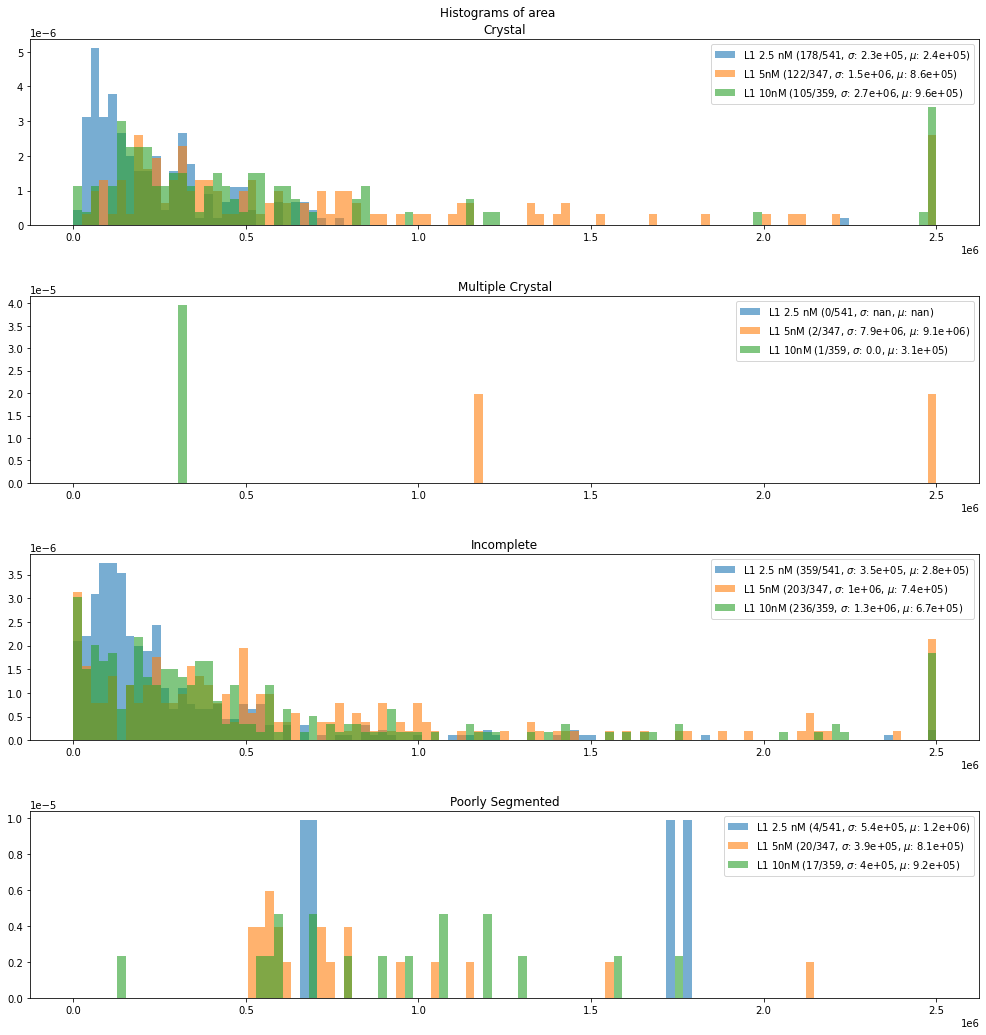

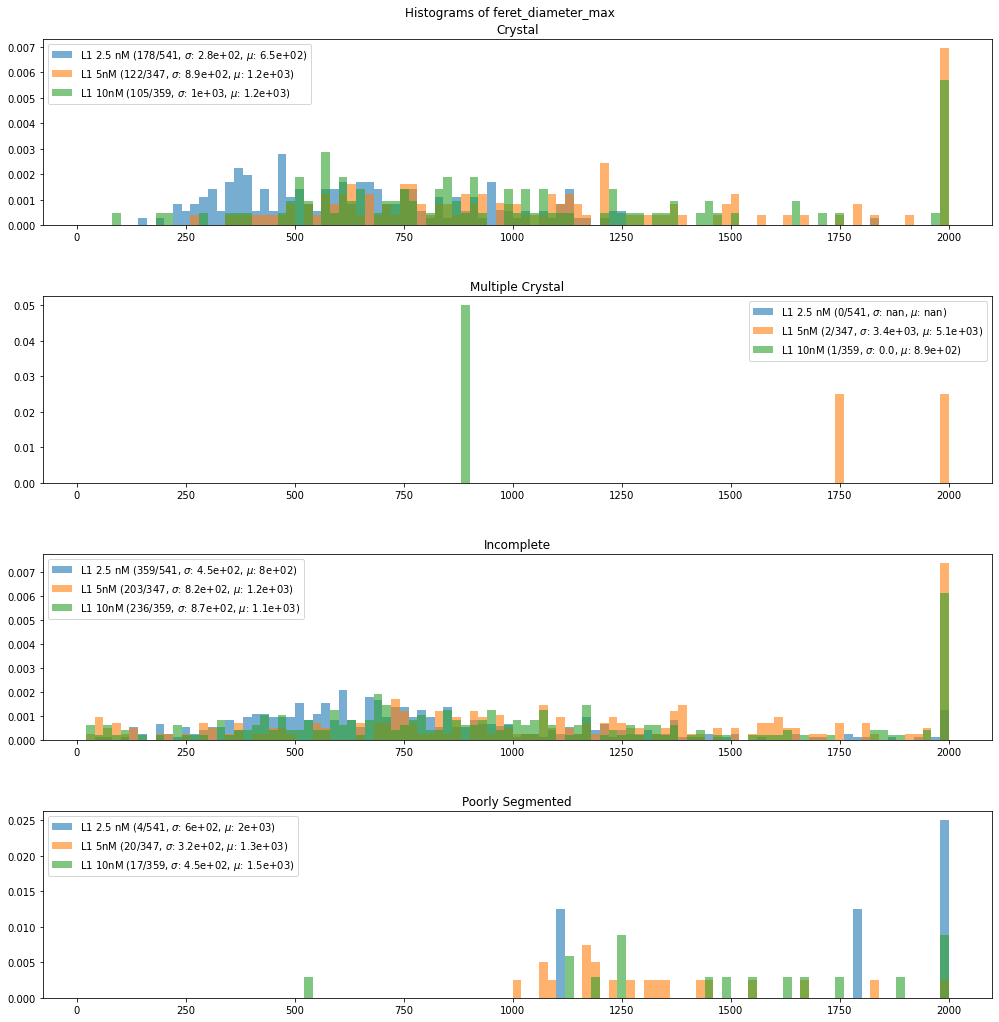

In [3]:
histogram_features = ['area','feret_diameter_max']

for histogram_feature in histogram_features:
    maxed = 2.50*10**6 if histogram_feature == 'area' else 2000
    fig, ax = plt.subplots(4, 1,figsize = (15, 15))
    fig.tight_layout(pad=5.0)
    fig.suptitle(f'Histograms of {histogram_feature}')
    class_list = ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]
    histogram_min = min([min(df[histogram_feature]) for df in df_exp])
    histogram_max = max([max(df[histogram_feature]) for df in df_exp])
    histogram_bins = np.round(np.linspace(histogram_min,maxed,100))
    #histogram_bins = np.append(histogram_bins,histogram_max)
    #histogram_bins = histogram_bins[1:].astype('str')
    #histogram_bins[-1] += '+'
    print(histogram_bins)
    for ii in np.arange(len(class_list)):
        for df,file in list(zip(df_exp,files)):
            sub_df = df[df["Labels"] == class_list[ii]]
            x_data = sub_df[histogram_feature]
            counts = len(x_data)
            total_counts = len(df)
            sigma = np.std(x_data)
            mu = np.mean(x_data)
            ax[ii].hist(np.clip(x_data,histogram_bins[0],histogram_bins[-1]),\
                        alpha=0.6,label=f'{file} ({counts}/{total_counts}, $\sigma$: {sigma:.2}, $\mu$: {mu:.2})'\
                        ,bins=histogram_bins,density=True)
        ax[ii].title.set_text(class_list[ii])
        ax[ii].legend()
        
        #xlabels = histogram_bins[1:].astype(str)
        #xlabels[-1] += '+'

        #N_labels = len(xlabels)
        #fig.xlim([0, maxed])
        #ax[ii].xticks(25 * np.arange(N_labels) + 12.5)
        #ax[ii].set_xticklabels(xlabels)
        
    fig.show()

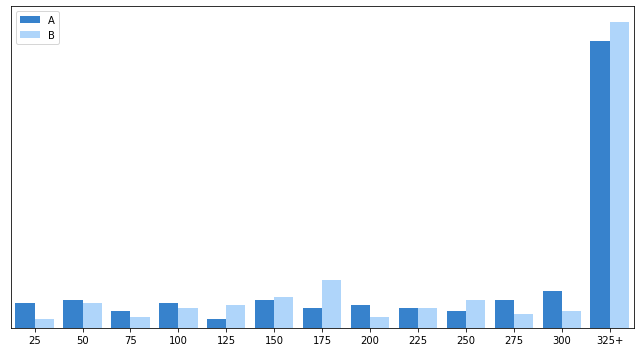

In [4]:
def plot_histogram_01():
    np.random.seed(1)
    values_A = np.random.choice(np.arange(600), size=200, replace=True)
    values_B = np.random.choice(np.arange(600), size=200, replace=True)

    bins = np.arange(0,350,25)

    fig, ax = plt.subplots(figsize=(9, 5))
    _, bins, patches = plt.hist([np.clip(values_A, bins[0], bins[-1]),
                                 np.clip(values_B, bins[0], bins[-1])],
                                # normed=1,  # normed is deprecated; replace with density
                                density=True,
                                bins=bins, color=['#3782CC', '#AFD5FA'], label=['A', 'B'])

    xlabels = bins[1:].astype(str)
    xlabels[-1] += '+'

    N_labels = len(xlabels)
    plt.xlim([0, 325])
    plt.xticks(25 * np.arange(N_labels) + 12.5)
    ax.set_xticklabels(xlabels)

    plt.yticks([])
    plt.title('')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper left')

    fig.tight_layout()
plot_histogram_01()